# Trasfer learning for hymenoptera_data

В задании использован код из туториала pytroch. Идея взята из курса по глубинному обучению на ФКН.

Скачайте архив с данными и распакуйте его:
    https://download.pytorch.org/tutorial/hymenoptera_data.zip
    
Задача: научиться классифицировать изображения пчел и муравьев

In [ ]:
# for linux
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip ./hymenoptera_data.zip

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
#from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os

Подготовка данных, включая аугментацию:

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

#use_gpu = torch.cuda.is_available()
use_gpu = False

/Users/user/anaconda3/anaconda3/lib/python3.6/site-packages/torchvision-0.2.0-py3.6.egg/torchvision/transforms/transforms.py:397: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
/Users/user/anaconda3/anaconda3/lib/python3.6/site-packages/torchvision-0.2.0-py3.6.egg/torchvision/transforms/transforms.py:156: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.


Примеры изображений:

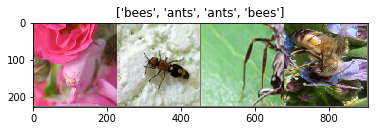

In [4]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    #plt.pause(0.9)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Загружаем предобученную модель:

In [ ]:
model_ft = models.resnet18(pretrained=True)

Структура нейросети:

In [ ]:
for x in model_ft.named_modules():
    print(x[0], x[1])

Замените последний полносвязный слой на слой для классификации на пчел и муравьев:

In [ ]:
### your code here

Мы не будем дообучать основную сеть, а будем обучать только полносвязный слой.
Отключите вычисление градиентов для всех параметров нейросети, кроме двух последних матриц (веса и сдвиги полносвязного слоя):

In [ ]:
### your code here

Скопируйте (или импортируйте) сюда функции train_epoch, evaluate_loss_acc и train из основного задания:

In [ ]:
### copy code here

Обучите веса полносвязного слоя. Не забудьте, что в оптимизитор нужно передавать только веса последнего слоя! Поэкспериментируйте с разными оптимизаторами и длиной шага. У вас должно получиться качество на валидации не меньше, чем 94%.

In [ ]:
### your code here